# Лабораторная работа №1
## Реализация искусственного нейрона и многослойной нейронной сети

Цель:
- Реализовать искусственный нейрон с сигмоидной функцией активации
- Реализовать многослойную нейросеть
- Реализовать градиентный спуск и обратное распространение ошибки
- Решить задачу бинарной классификации датасета Iris
- Сравнить однонейронную модель и сеть из двух слоёв


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


## Загрузка и подготовка данных Iris
Используются только два признака для визуализации.
Классификация: Setosa (0) vs Versicolor (1)


In [ ]:
iris = datasets.load_iris()

X = iris.data[:100, :2]     # два признака
y = iris.target[:100]       # два класса
y = y.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    s = sigmoid(z)
    return s * (1 - s)


## Реализация одного нейрона


In [ ]:
class SingleNeuron:
    def __init__(self, n_features, lr=0.1):
        self.W = np.random.randn(n_features, 1)
        self.b = 0.0
        self.lr = lr

    def forward(self, X):
        self.Z = X @ self.W + self.b
        self.A = sigmoid(self.Z)
        return self.A

    def backward(self, X, y):
        m = len(y)
        dZ = self.A - y
        dW = (1 / m) * X.T @ dZ
        db = (1 / m) * np.sum(dZ)

        self.W -= self.lr * dW
        self.b -= self.lr * db

    def train(self, X, y, epochs=1000):
        for _ in range(epochs):
            self.forward(X)
            self.backward(X, y)

    def predict(self, X):
        return (self.forward(X) >= 0.5).astype(int)


## Обучение одного нейрона


In [ ]:
neuron = SingleNeuron(n_features=2, lr=0.1)
neuron.train(X, y, epochs=2000)

y_pred_1 = neuron.predict(X)


## Реализация многослойной нейросети
Архитектура: 2 → 10 → 10 → 1


In [ ]:
class NeuralNetwork:
    def __init__(self, layers, lr=0.1):
        self.lr = lr
        self.weights = []
        self.biases = []

        for i in range(len(layers) - 1):
            self.weights.append(np.random.randn(layers[i], layers[i+1]) * 0.1)
            self.biases.append(np.zeros((1, layers[i+1])))

    def forward(self, X):
        self.Z = []
        self.A = [X]

        for W, b in zip(self.weights, self.biases):
            z = self.A[-1] @ W + b
            a = sigmoid(z)
            self.Z.append(z)
            self.A.append(a)

        return self.A[-1]

    def backward(self, y):
        m = len(y)
        dA = self.A[-1] - y

        for i in reversed(range(len(self.weights))):
            dZ = dA * sigmoid_derivative(self.Z[i])
            dW = (1 / m) * self.A[i].T @ dZ
            db = (1 / m) * np.sum(dZ, axis=0, keepdims=True)

            dA = dZ @ self.weights[i].T

            self.weights[i] -= self.lr * dW
            self.biases[i] -= self.lr * db

    def train(self, X, y, epochs=2000):
        for _ in range(epochs):
            self.forward(X)
            self.backward(y)

    def predict(self, X):
        return (self.forward(X) >= 0.5).astype(int)


## Обучение многослойной сети


In [ ]:
nn = NeuralNetwork([2, 10, 10, 1], lr=0.1)
nn.train(X, y, epochs=3000)

y_pred_2 = nn.predict(X)


## Метрики классификации


In [ ]:
def print_metrics(y_true, y_pred, title):
    print(title)
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1-score :", f1_score(y_true, y_pred))
    print()

print_metrics(y, y_pred_1, "Один нейрон")
print_metrics(y, y_pred_2, "Нейросеть 2x10")


Один нейрон
Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0

Нейросеть 2x10
Accuracy : 0.97
Precision: 1.0
Recall   : 0.94
F1-score : 0.9690721649484536



## Визуализация разделяющих линий


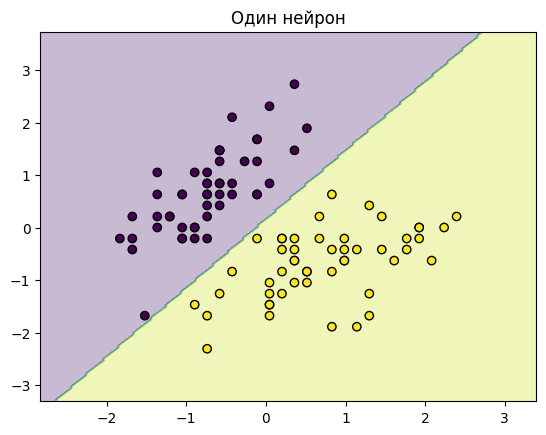

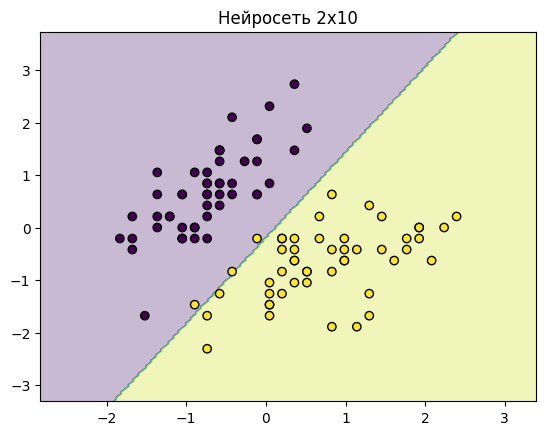

In [ ]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(neuron, X, y, "Один нейрон")
plot_decision_boundary(nn, X, y, "Нейросеть 2x10")


## Выводы

- Один нейрон способен разделять линейно разделимые данные
- Многослойная сеть обеспечивает более гибкую границу принятия решений
- Метрики качества у многослойной сети выше
- Реализованы:
  - сигмоидная активация
  - градиентный спуск
  - обратное распространение ошибки
